In [ ]:
import numpy as np
import os
import librosa
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import pickle

# Testes de precisao para classificar apenas Choro, silencio e ruidos externos

In [31]:
testes = 100 #Features
classes = ['CryingV2', 'laugh', 'Noise','silence']
listaModeloPrecisao=[]

In [32]:
for mfcc in range(1,testes+1):
    try:
        # carregar os arquivos de áudio e extrair recursos
        features = []
        labels = []
        for c in classes:
            path = c + '/'
            for filename in os.listdir(path):
                if filename.endswith('.wav') or filename.endswith('.ogg'):
                    file_path = os.path.join(path, filename)
                    x, sr = librosa.load(file_path)
                    mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=mfcc)
                    features.append(np.mean(mfccs, axis=1))
                    labels.append(c)

        # dividir o conjunto de dados em treinamento e teste 0.2
        X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.7, random_state=42)

        # criar um classificador MLP
        clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=600)

        # treinar o classificador
        clf.fit(X_train, y_train)

        # fazer previsões no conjunto de teste
        y_pred = clf.predict(X_test)

        # avaliar a precisão do classificador
        accuracy = accuracy_score(y_test, y_pred)
        print('Precisão do classificador: {:.2f}%'.format(accuracy * 100))
        listaModeloPrecisao.append(accuracy * 100)
    except Exception as e:
            print(e)
            pass

Precisão do classificador: 65.10%
Precisão do classificador: 62.34%
Precisão do classificador: 59.25%
Precisão do classificador: 83.77%
Precisão do classificador: 88.47%
Precisão do classificador: 88.80%
Precisão do classificador: 91.23%
Precisão do classificador: 92.21%
Precisão do classificador: 91.72%
Precisão do classificador: 92.05%
Precisão do classificador: 93.02%
Precisão do classificador: 93.67%
Precisão do classificador: 93.67%
Precisão do classificador: 92.69%
Precisão do classificador: 94.16%
Precisão do classificador: 92.53%
Precisão do classificador: 93.51%
Precisão do classificador: 93.83%
Precisão do classificador: 92.86%
Precisão do classificador: 93.18%
Precisão do classificador: 94.64%
Precisão do classificador: 91.88%
Precisão do classificador: 92.37%
Precisão do classificador: 92.05%
Precisão do classificador: 93.83%
Precisão do classificador: 93.67%
Precisão do classificador: 93.18%
Precisão do classificador: 92.69%
Precisão do classificador: 92.53%
Precisão do cl

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

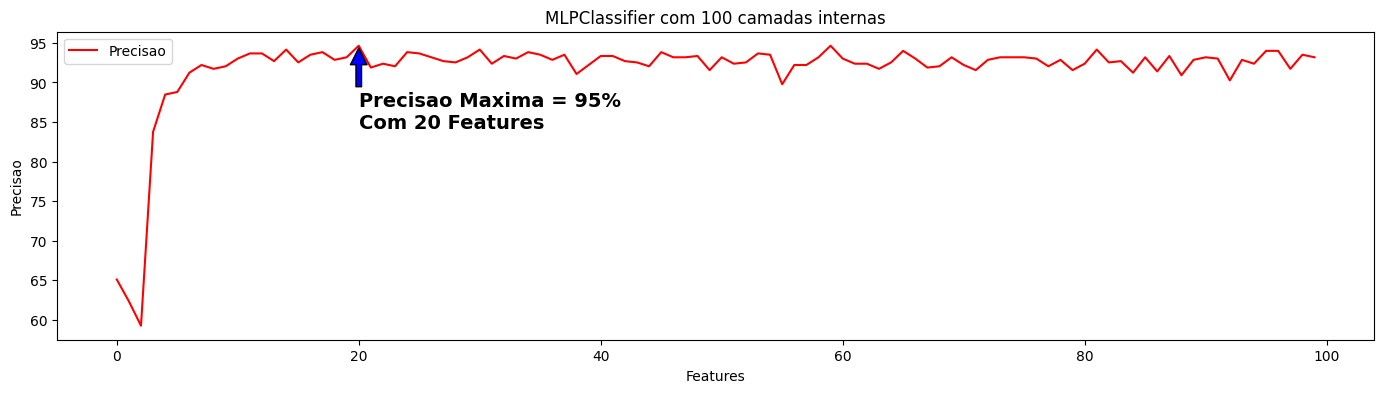

In [67]:
fig = plt.figure(figsize=(17, 4))
plt.plot(listaModeloPrecisao, label='Precisao',color='red')
plt.xlabel('Features')
plt.ylabel('Precisao')
plt.title('MLPClassifier com 100 camadas internas')
plt.legend()
PrecisaoMax =  np.argmax(listaModeloPrecisao)
plt.annotate(f'Precisao Maxima = {round(listaModeloPrecisao[PrecisaoMax])}% \nCom {PrecisaoMax} Features', xy=(PrecisaoMax, listaModeloPrecisao[PrecisaoMax]),
             xytext=(PrecisaoMax, listaModeloPrecisao[PrecisaoMax] + -10.5),
             arrowprops=dict(facecolor='blue', shrink=0.05),
             fontsize=14, fontweight='bold', color='black')
plt.show()

sao 21 Features que atingem a precisao Maxima e nao 20

# Teste de precisao para classificar tipos de choro

In [77]:
testes = 100 #Features
classes = ['belly_pain','burping','discomfort','hungry','tired']
listaModeloPrecisao=[]

In [78]:
for mfcc in range(1,testes+1):
    try:
        # carregar os arquivos de áudio e extrair recursos
        features = []
        labels = []
        for c in classes:
            path = c + '/'
            for filename in os.listdir(path):
                if filename.endswith('.wav') or filename.endswith('.ogg'):
                    file_path = os.path.join(path, filename)
                    x, sr = librosa.load(file_path)
                    mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=mfcc)
                    features.append(np.mean(mfccs, axis=1))
                    labels.append(c)

        # dividir o conjunto de dados em treinamento e teste 0.2
        X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.7, random_state=42)

        # criar um classificador MLP
        clf = MLPClassifier(hidden_layer_sizes=(600,), max_iter=2000)

        # treinar o classificador
        clf.fit(X_train, y_train)

        # fazer previsões no conjunto de teste
        y_pred = clf.predict(X_test)

        # avaliar a precisão do classificador
        accuracy = accuracy_score(y_test, y_pred)
        print('Precisão do classificador: {:.2f}%'.format(accuracy * 100))
        listaModeloPrecisao.append(accuracy * 100)
    except Exception as e:
        print(e)
        pass

Precisão do classificador: 84.06%
Precisão do classificador: 84.06%
Precisão do classificador: 83.12%
Precisão do classificador: 78.75%
Precisão do classificador: 77.81%
Precisão do classificador: 80.62%
Precisão do classificador: 80.00%
Precisão do classificador: 82.81%
Precisão do classificador: 79.06%
Precisão do classificador: 80.31%
Precisão do classificador: 83.75%
Precisão do classificador: 84.06%
Precisão do classificador: 83.44%
Precisão do classificador: 78.44%
Precisão do classificador: 78.75%
Precisão do classificador: 83.75%
Precisão do classificador: 62.81%
Precisão do classificador: 75.94%
Precisão do classificador: 77.81%
Precisão do classificador: 59.38%
Precisão do classificador: 83.44%
Precisão do classificador: 78.12%
Precisão do classificador: 76.88%
Precisão do classificador: 80.31%
Precisão do classificador: 79.69%
Precisão do classificador: 84.06%
Precisão do classificador: 78.75%
Precisão do classificador: 76.56%
Precisão do classificador: 66.56%
Precisão do cl

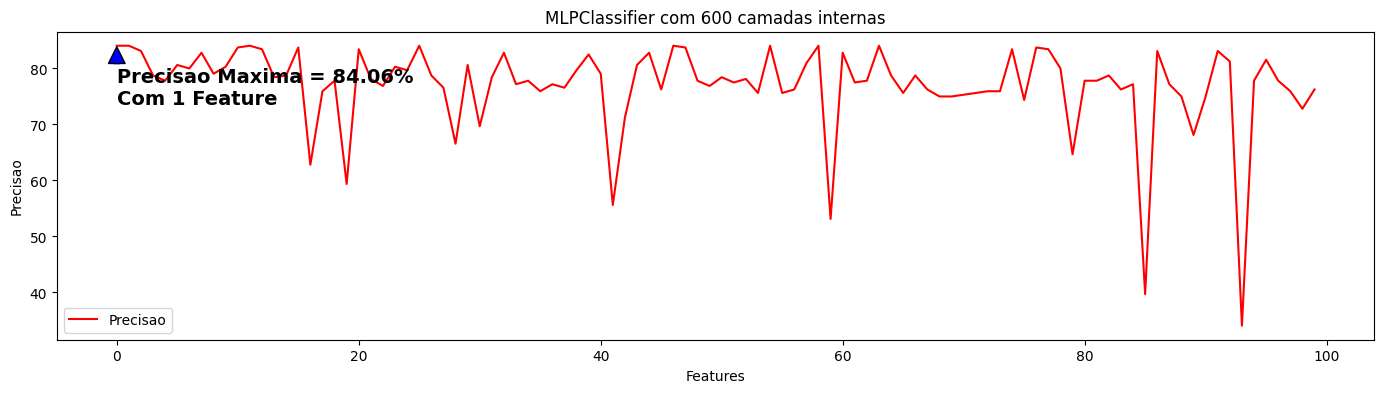

In [81]:
fig = plt.figure(figsize=(17, 4))
plt.plot(listaModeloPrecisao, label='Precisao',color='red')
plt.xlabel('Features')
plt.ylabel('Precisao')
plt.title('MLPClassifier com 600 camadas internas')
plt.legend()
PrecisaoMax =  np.argmax(listaModeloPrecisao)
plt.annotate(f'Precisao Maxima = {round(listaModeloPrecisao[PrecisaoMax],2)}% \nCom {PrecisaoMax+1} Feature', xy=(PrecisaoMax, listaModeloPrecisao[PrecisaoMax]),
             xytext=(PrecisaoMax, listaModeloPrecisao[PrecisaoMax] + -10.5),
             arrowprops=dict(facecolor='blue', shrink=0.05),
             fontsize=14, fontweight='bold', color='black')
plt.show()